In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, MaxPooling1D
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Calculate metrics
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

In [3]:
df = pd.read_excel('data_Finel.xlsx')
df.head()

,Field of activity,Process / Machine / Equipement,Risk Related,Risk Causes,Risk Effects,Severity (1-10),Occurrence (1-10),Impact (1-10),Criticality (Severity * Occurrence * Impact)
0,Office administrative / support/ other busines...,Production,Operator error,Insufficient training,Damage to machinery,7,8,9,504
1,Automotive industry,Production,Improper use of extension cords,"Overloading, improper connections","Fire, equipment damage",4,7,10,280
2,Dyeing of textile and clothing,Management,Leadership turnover,High executive turnover,Decreased morale,8,5,1,40
3,Financial services incl. Insurance business,Production,Calibration errors,Poor calibration practices,Inconsistent product quality,5,6,3,90
4,Actitivities of membership organisations,Compliance,Non-compliance with labor laws,Lack of awareness,Legal penalties,7,4,7,196


In [4]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=[
    'Field of activity', 'Process / Machine / Equipement', 'Risk Related', 'Risk Causes', 'Risk Effects'
])

# Separate features and target
X = df_encoded.drop(columns=['Criticality (Severity * Occurrence * Impact)'])
y = df_encoded['Criticality (Severity * Occurrence * Impact)']

In [16]:
import pickle
with open('encoder_columns.pkl', 'wb') as f:
    pickle.dump(df_encoded.columns.tolist(), f)

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [6]:
# Define the model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Conv1D(filters=32, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

C:\Users\MOHAMMED SAID\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
# Reshape the input data to fit the model
X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

In [9]:
# Train the model
history = cnn_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - loss: 30857.3691 - val_loss: 6405.8535
Epoch 2/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - loss: 8542.6416 - val_loss: 2795.6416
Epoch 3/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - loss: 6880.4917 - val_loss: 3317.9165
Epoch 4/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - loss: 6574.4141 - val_loss: 2164.6628
Epoch 5/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 5818.2012 - val_loss: 2142.6489
Epoch 6/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - loss: 5355.3892 - val_loss: 2073.6685
Epoch 7/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - loss: 4785.6641 - val_loss: 1412.8315
Epoch 8/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - loss: 4734.7725 - val_loss: 1789.3978
Epoch 9/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 3986.8135 - val_loss: 1274.0693
Epoch 10/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 4061.7380 - val_loss: 1272.7849
Epoch 11/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - l

In [10]:
# Make predictions
y_pred_cnn = cnn_model.predict(X_test_reshaped)

185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [11]:
# Evaluate the model
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
print(f"CNN Model Mean Absolute Error: {mae_cnn}")

CNN Model Mean Absolute Error: 32.50261688232422


In [12]:
comparisonCNN = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_cnn.flatten()})
comparisonCNN

,Actual,Predicted
28260,10.0,20.611496
15601,224.0,184.601044
7839,54.0,38.459961
4850,126.0,85.798874
4699,135.0,123.115074
...,...,...
21809,3.0,10.627508
19517,90.0,53.161472
28844,360.0,325.265198
3,90.0,60.314533


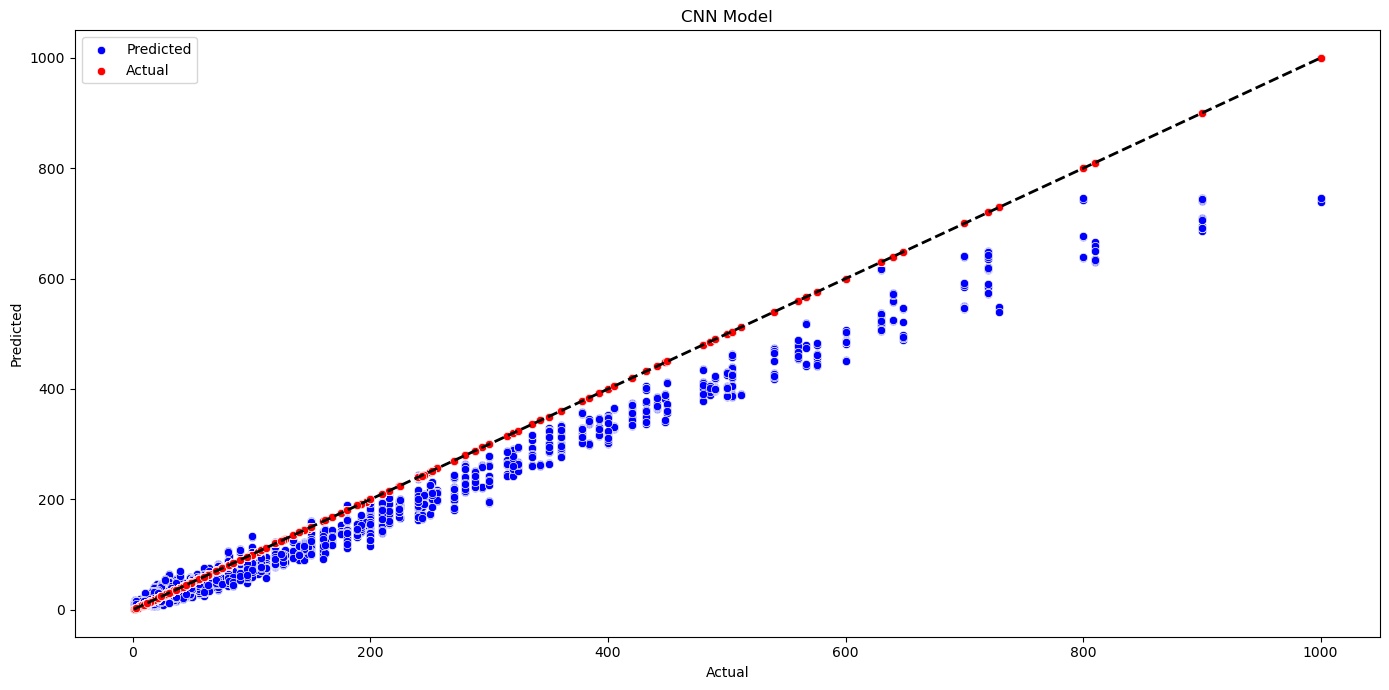

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the results
plt.figure(figsize=(14, 7))

# MLP Model
plt.subplot(1, 1, 1)

# Plot predicted values in blue
sns.scatterplot(x=y_test, y=y_pred_cnn.flatten(), color='blue', label='Predicted')

# Plot actual values in red
sns.scatterplot(x=y_test, y=y_test, color='red', label='Actual')

# Plot the identity line (45-degree line) for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('CNN Model')

# Show legend
plt.legend()

# Add titles and layout adjustments
plt.tight_layout()
plt.show()

In [14]:
mae, mse, rmse, r2 = calculate_metrics(y_test, y_pred_cnn)
print(f"  CNN Model Metrics:")
print(f"  Mean Absolute Error (MAE): {mae}")
print(f"  Mean Squared Error (MSE): {mse}")
print(f"  Root Mean Squared Error (RMSE): {rmse}")
print(f"  R^2 Score: {r2}\n")

  CNN Model Metrics:
  Mean Absolute Error (MAE): 32.50261688232422
  Mean Squared Error (MSE): 2014.7821044921875
  Root Mean Squared Error (RMSE): 44.88632583618164
  R^2 Score: 0.9300068718819032

